In [1]:
# 引入库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# 设置绘图中文支持
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"]=False # 用来正常显示负号
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签

% matplotlib inline

UsageError: Line magic function `%` not found.


In [24]:
# 读取数据
lianjia = pd.read_csv('链家分区汇总.csv', encoding='utf-8', sep='\t')

# 设置一些细节
pd.set_option('max_colwidth', 60)    # 设置每个字段最多显示60个字符
pd.set_option('max_columns', 50)     # 设置每个dataframe显示50个字段

lianjia.head()

D:\Anaconda\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,成交价（万）,成交时间,所在小区,户型,建筑面积,挂牌价格（万）,成交周期（天）,调价（次）,带看（次）,关注（人）,浏览（次,链家编号,交易权属,挂牌时间,房屋用途,房屋年限,房权所属,房屋户型,所在楼层,户型结构,套内面积（㎡）,建筑类型,房屋朝向,建成年代,装修情况,建筑结构,供暖方式,梯户比例,产权年限,配备电梯,xx1,xx2
0,大兴,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,297,2019-10-29 成交,格林云墅,3室1厅,89.95,300,608,1.0,4.0,43.0,6424,1.01E+11,商品房,2018/3/1,普通住宅,满两年,非共有,3室1厅1厨1卫,中楼层(共9层),暂无数据,73.63,塔楼,南 北,2014,精装,钢混结构,集中供暖,一梯两户,70,有,NaN,NaN
2,366,2019-10-29 成交,三羊里,2室1厅,89.79,368,31,0.0,3.0,4.0,118,1.01E+11,商品房,2019/9/29,普通住宅,满两年,非共有,2室1厅1厨1卫,中楼层(共6层),平层,80.44,板楼,南 北,2009,其他,钢混结构,集中供暖,一梯两户,70,无,NaN,NaN
3,226,2019-10-29 成交,亦庄北岸,1室1厅,56.04,230,364,1.0,98.0,141.0,4707,1.01E+11,商品房,2018/10/31,普通住宅,满五年,非共有,1室1厅1厨1卫,底层(共15层),平层,45.99,板塔结合,东北,2008,简装,钢混结构,自供暖,两梯四户,70,有,NaN,NaN
4,548,2019-10-29 成交,时代龙和,3室2厅,144.65,595,39,0.0,17.0,19.0,972,1.01E+11,商品房,2019/9/21,普通住宅,满五年,非共有,3室2厅1厨2卫,中楼层(共15层),平层,118.59,板塔结合,南 北,2007,简装,钢混结构,自供暖,一梯两户,70,有,NaN,NaN


In [25]:
# 查看整体数据
lianjia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38393 entries, 0 to 38392
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   成交价（万）   38393 non-null  object 
 1   成交时间     38379 non-null  object 
 2   所在小区     38379 non-null  object 
 3   户型       38379 non-null  object 
 4   建筑面积     38379 non-null  object 
 5   挂牌价格（万）  38379 non-null  object 
 6   成交周期（天）  38379 non-null  object 
 7   调价（次）    38379 non-null  float64
 8   带看（次）    38379 non-null  float64
 9   关注（人）    38379 non-null  float64
 10  浏览（次     38379 non-null  object 
 11  链家编号     38379 non-null  object 
 12  交易权属     38379 non-null  object 
 13  挂牌时间     38379 non-null  object 
 14  房屋用途     38379 non-null  object 
 15  房屋年限     38379 non-null  object 
 16  房权所属     38379 non-null  object 
 17  房屋户型     38379 non-null  object 
 18  所在楼层     38379 non-null  object 
 19  户型结构     38379 non-null  object 
 20  套内面积（㎡）  38379 non-null  object 
 21  建筑类型     383

In [26]:
# 了解一下所有的字段信息
lianjia.columns

Index(['成交价（万）', '成交时间', '所在小区', '户型', '建筑面积', '挂牌价格（万）', '成交周期（天）', '调价（次）',
       '带看（次）', '关注（人）', '浏览（次', '链家编号', '交易权属', '挂牌时间', '房屋用途', '房屋年限',
       '房权所属', '房屋户型', '所在楼层', '户型结构', '套内面积（㎡）', '建筑类型', '房屋朝向', '建成年代',
       '装修情况', '建筑结构', '供暖方式', '梯户比例', '产权年限', '配备电梯', 'xx1', 'xx2'],
      dtype='object')

#### 将分区数据整理规范

In [27]:
# 增加一个大区列
lianjia['大区'] = lianjia['成交价（万）']  # 把 成交价（万）这个字段的值赋给 大区 这个字段
lianjia[['大区', '成交价（万）']].sample(10)

,大区,成交价（万）
22275,403-412,403-412
16028,190,190
6059,185,185
17802,379,379
23867,371,371
2866,745,745
21762,272,272
1945,333-340,333-340
33861,288-293,288-293
31215,240,240


在大区字段中，除了成交价的正常数值外，还有特殊格式的数值  128-141, ...

In [28]:
# 执行替换
# 把 大区 列进行替换，所谓有 128-141 或者 '375' 的字符串都替换成 Nan
lianjia['大区'] = lianjia['大区'].str.replace('-', '').replace('\d+', np.nan, regex=True)  # 使用了 正则表达式

In [29]:
lianjia['大区'].head()

0     大兴
1    NaN
2    NaN
3    NaN
4    NaN
Name: 大区, dtype: object

In [30]:
# 查看替换结果
lianjia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38393 entries, 0 to 38392
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   成交价（万）   38393 non-null  object 
 1   成交时间     38379 non-null  object 
 2   所在小区     38379 non-null  object 
 3   户型       38379 non-null  object 
 4   建筑面积     38379 non-null  object 
 5   挂牌价格（万）  38379 non-null  object 
 6   成交周期（天）  38379 non-null  object 
 7   调价（次）    38379 non-null  float64
 8   带看（次）    38379 non-null  float64
 9   关注（人）    38379 non-null  float64
 10  浏览（次     38379 non-null  object 
 11  链家编号     38379 non-null  object 
 12  交易权属     38379 non-null  object 
 13  挂牌时间     38379 non-null  object 
 14  房屋用途     38379 non-null  object 
 15  房屋年限     38379 non-null  object 
 16  房权所属     38379 non-null  object 
 17  房屋户型     38379 non-null  object 
 18  所在楼层     38379 non-null  object 
 19  户型结构     38379 non-null  object 
 20  套内面积（㎡）  38379 non-null  object 
 21  建筑类型     383

#### 填充缺失值

In [31]:
# 把 大区 字段中的 Nan 都用之前的那个有效值替换即可
lianjia['大区'].fillna(inplace=True, method='ffill')

In [32]:
lianjia['大区'].sample(10)

12243       海淀
32914       昌平
32092    亦庄开发区
13882       海淀
5558        朝阳
2607        大兴
20036      石景山
10246       丰台
21031       顺义
32696       昌平
Name: 大区, dtype: object

In [33]:
lianjia.head()

,成交价（万）,成交时间,所在小区,户型,建筑面积,挂牌价格（万）,成交周期（天）,调价（次）,带看（次）,关注（人）,浏览（次,链家编号,交易权属,挂牌时间,房屋用途,房屋年限,房权所属,房屋户型,所在楼层,户型结构,套内面积（㎡）,建筑类型,房屋朝向,建成年代,装修情况,建筑结构,供暖方式,梯户比例,产权年限,配备电梯,xx1,xx2,大区
0,大兴,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,大兴
1,297,2019-10-29 成交,格林云墅,3室1厅,89.95,300,608,1.0,4.0,43.0,6424,1.01E+11,商品房,2018/3/1,普通住宅,满两年,非共有,3室1厅1厨1卫,中楼层(共9层),暂无数据,73.63,塔楼,南 北,2014,精装,钢混结构,集中供暖,一梯两户,70,有,NaN,NaN,大兴
2,366,2019-10-29 成交,三羊里,2室1厅,89.79,368,31,0.0,3.0,4.0,118,1.01E+11,商品房,2019/9/29,普通住宅,满两年,非共有,2室1厅1厨1卫,中楼层(共6层),平层,80.44,板楼,南 北,2009,其他,钢混结构,集中供暖,一梯两户,70,无,NaN,NaN,大兴
3,226,2019-10-29 成交,亦庄北岸,1室1厅,56.04,230,364,1.0,98.0,141.0,4707,1.01E+11,商品房,2018/10/31,普通住宅,满五年,非共有,1室1厅1厨1卫,底层(共15层),平层,45.99,板塔结合,东北,2008,简装,钢混结构,自供暖,两梯四户,70,有,NaN,NaN,大兴
4,548,2019-10-29 成交,时代龙和,3室2厅,144.65,595,39,0.0,17.0,19.0,972,1.01E+11,商品房,2019/9/21,普通住宅,满五年,非共有,3室2厅1厨2卫,中楼层(共15层),平层,118.59,板塔结合,南 北,2007,简装,钢混结构,自供暖,一梯两户,70,有,NaN,NaN,大兴


In [34]:
# 删除 大兴 nan nan ... 这种记录
lianjia.dropna(axis=0, inplace=True, thresh=20)  # 按行删除，当不为空的字段超过20个的时候，就不删除
lianjia.head()

,成交价（万）,成交时间,所在小区,户型,建筑面积,挂牌价格（万）,成交周期（天）,调价（次）,带看（次）,关注（人）,浏览（次,链家编号,交易权属,挂牌时间,房屋用途,房屋年限,房权所属,房屋户型,所在楼层,户型结构,套内面积（㎡）,建筑类型,房屋朝向,建成年代,装修情况,建筑结构,供暖方式,梯户比例,产权年限,配备电梯,xx1,xx2,大区
1,297,2019-10-29 成交,格林云墅,3室1厅,89.95,300,608,1.0,4.0,43.0,6424,1.01E+11,商品房,2018/3/1,普通住宅,满两年,非共有,3室1厅1厨1卫,中楼层(共9层),暂无数据,73.63,塔楼,南 北,2014,精装,钢混结构,集中供暖,一梯两户,70,有,NaN,NaN,大兴
2,366,2019-10-29 成交,三羊里,2室1厅,89.79,368,31,0.0,3.0,4.0,118,1.01E+11,商品房,2019/9/29,普通住宅,满两年,非共有,2室1厅1厨1卫,中楼层(共6层),平层,80.44,板楼,南 北,2009,其他,钢混结构,集中供暖,一梯两户,70,无,NaN,NaN,大兴
3,226,2019-10-29 成交,亦庄北岸,1室1厅,56.04,230,364,1.0,98.0,141.0,4707,1.01E+11,商品房,2018/10/31,普通住宅,满五年,非共有,1室1厅1厨1卫,底层(共15层),平层,45.99,板塔结合,东北,2008,简装,钢混结构,自供暖,两梯四户,70,有,NaN,NaN,大兴
4,548,2019-10-29 成交,时代龙和,3室2厅,144.65,595,39,0.0,17.0,19.0,972,1.01E+11,商品房,2019/9/21,普通住宅,满五年,非共有,3室2厅1厨2卫,中楼层(共15层),平层,118.59,板塔结合,南 北,2007,简装,钢混结构,自供暖,一梯两户,70,有,NaN,NaN,大兴
5,245,2019-10-29 成交,观音寺北里,2室2厅,83.51,259,114,1.0,1.0,16.0,1309,1.01E+11,商品房,2019/7/7,普通住宅,满五年,非共有,2室2厅1厨1卫,中楼层(共6层),平层,暂无数据,板楼,东 西,1998,精装,混合结构,集中供暖,一梯两户,70,无,NaN,NaN,大兴


In [35]:
# 把大区的字段放到最前面
lianjia_daqu = lianjia['大区']  # 先把 大区 字段保存一下
lianjia.drop('大区', axis=1, inplace=True)  # 把原来的 大区 字段删除
lianjia.insert(0, '大区', lianjia_daqu)    # 将保存的 大区 字段插入lianjia表中

display(lianjia.head())

,大区,成交价（万）,成交时间,所在小区,户型,建筑面积,挂牌价格（万）,成交周期（天）,调价（次）,带看（次）,关注（人）,浏览（次,链家编号,交易权属,挂牌时间,房屋用途,房屋年限,房权所属,房屋户型,所在楼层,户型结构,套内面积（㎡）,建筑类型,房屋朝向,建成年代,装修情况,建筑结构,供暖方式,梯户比例,产权年限,配备电梯,xx1,xx2
1,大兴,297,2019-10-29 成交,格林云墅,3室1厅,89.95,300,608,1.0,4.0,43.0,6424,1.01E+11,商品房,2018/3/1,普通住宅,满两年,非共有,3室1厅1厨1卫,中楼层(共9层),暂无数据,73.63,塔楼,南 北,2014,精装,钢混结构,集中供暖,一梯两户,70,有,NaN,NaN
2,大兴,366,2019-10-29 成交,三羊里,2室1厅,89.79,368,31,0.0,3.0,4.0,118,1.01E+11,商品房,2019/9/29,普通住宅,满两年,非共有,2室1厅1厨1卫,中楼层(共6层),平层,80.44,板楼,南 北,2009,其他,钢混结构,集中供暖,一梯两户,70,无,NaN,NaN
3,大兴,226,2019-10-29 成交,亦庄北岸,1室1厅,56.04,230,364,1.0,98.0,141.0,4707,1.01E+11,商品房,2018/10/31,普通住宅,满五年,非共有,1室1厅1厨1卫,底层(共15层),平层,45.99,板塔结合,东北,2008,简装,钢混结构,自供暖,两梯四户,70,有,NaN,NaN
4,大兴,548,2019-10-29 成交,时代龙和,3室2厅,144.65,595,39,0.0,17.0,19.0,972,1.01E+11,商品房,2019/9/21,普通住宅,满五年,非共有,3室2厅1厨2卫,中楼层(共15层),平层,118.59,板塔结合,南 北,2007,简装,钢混结构,自供暖,一梯两户,70,有,NaN,NaN
5,大兴,245,2019-10-29 成交,观音寺北里,2室2厅,83.51,259,114,1.0,1.0,16.0,1309,1.01E+11,商品房,2019/7/7,普通住宅,满五年,非共有,2室2厅1厨1卫,中楼层(共6层),平层,暂无数据,板楼,东 西,1998,精装,混合结构,集中供暖,一梯两户,70,无,NaN,NaN


#### 预处理

In [36]:
lianjia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38379 entries, 1 to 38392
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   大区       38379 non-null  object 
 1   成交价（万）   38379 non-null  object 
 2   成交时间     38379 non-null  object 
 3   所在小区     38379 non-null  object 
 4   户型       38379 non-null  object 
 5   建筑面积     38379 non-null  object 
 6   挂牌价格（万）  38379 non-null  object 
 7   成交周期（天）  38379 non-null  object 
 8   调价（次）    38379 non-null  float64
 9   带看（次）    38379 non-null  float64
 10  关注（人）    38379 non-null  float64
 11  浏览（次     38379 non-null  object 
 12  链家编号     38379 non-null  object 
 13  交易权属     38379 non-null  object 
 14  挂牌时间     38379 non-null  object 
 15  房屋用途     38379 non-null  object 
 16  房屋年限     38379 non-null  object 
 17  房权所属     38379 non-null  object 
 18  房屋户型     38379 non-null  object 
 19  所在楼层     38379 non-null  object 
 20  户型结构     38379 non-null  object 
 21  套内面积（㎡）  383

总共有38379条记录，绝大部分字段都是38379个非空字段，只有xx1，xx2是3022个非空字段
  + 只有3022条记录的所有32个字段不是空的
  + 另外的 38379-3022 条记录都是30个字段不为空的

In [38]:
display(lianjia['xx1'].unique())   # 这些值应该是 房屋产权年限
display(lianjia['xx2'].unique())

array([nan, '70', '40', '50', '未知'], dtype=object)

array([nan, '有', '无', '暂无数据'], dtype=object)

这 3022 条数据可能发生了错位，这里为方便起见，删除这 3022 条非空的数据

In [39]:
lianjia.drop(lianjia[(lianjia['xx2'] == '有')].index, inplace=True)
lianjia.drop(lianjia[(lianjia['xx2'] == '无')].index, inplace=True)
lianjia.drop(lianjia[(lianjia['xx2'] == '暂无数据')].index, inplace=True)

In [40]:
# 检查一下数据
display(lianjia['xx1'].unique())
display(lianjia['xx2'].unique())

array([nan], dtype=object)

array([nan], dtype=object)

In [41]:
# 删除 xx1, xx2 两列
lianjia.drop(axis=1, columns=['xx1', 'xx2'], inplace=True)

In [42]:
# 重新检查一下整体数据
lianjia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35357 entries, 1 to 35369
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   大区       35357 non-null  object 
 1   成交价（万）   35357 non-null  object 
 2   成交时间     35357 non-null  object 
 3   所在小区     35357 non-null  object 
 4   户型       35357 non-null  object 
 5   建筑面积     35357 non-null  object 
 6   挂牌价格（万）  35357 non-null  object 
 7   成交周期（天）  35357 non-null  object 
 8   调价（次）    35357 non-null  float64
 9   带看（次）    35357 non-null  float64
 10  关注（人）    35357 non-null  float64
 11  浏览（次     35357 non-null  object 
 12  链家编号     35357 non-null  object 
 13  交易权属     35357 non-null  object 
 14  挂牌时间     35357 non-null  object 
 15  房屋用途     35357 non-null  object 
 16  房屋年限     35357 non-null  object 
 17  房权所属     35357 non-null  object 
 18  房屋户型     35357 non-null  object 
 19  所在楼层     35357 non-null  object 
 20  户型结构     35357 non-null  object 
 21  套内面积（㎡）  353

数据中没有缺失值了

#### 处理其他字段

In [43]:
# 查看一下行索引
lianjia.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            35360, 35361, 35362, 35363, 35364, 35365, 35366, 35367, 35368,
            35369],
           dtype='int64', length=35357)

In [44]:
# 重置行索引
lianjia = lianjia.reset_index()
lianjia.index

RangeIndex(start=0, stop=35357, step=1)

##### 处理  大区，成交时间，所在小区，户型，建筑面积    字段

In [45]:
lianjia[['大区', '成交时间', '所在小区', '户型', '建筑面积']].sample(10)

,大区,成交时间,所在小区,户型,建筑面积
19004,石景山,2019-07-15 成交,永乐东区,2室1厅,63.78
2336,大兴,2019-06 成交,金荣园,2室1厅,79.75
7974,房山,2019-03-16 成交,碧桂园小区C区,3室1厅,117.89
19862,石景山,2019-05-22 成交,海特花园小区,3室1厅,114.24
12504,海淀,2019-10-09 成交,上地东里,3室1厅,76
8186,房山,2019-03 成交,瑞雪春堂,2室1厅,81.99
28483,西城,2019-06-11 成交,畅柳园,3室1厅,90.1
11404,丰台,2019-07-29 成交,北大地三里16号院,2室1厅,60.27
1483,大兴,2019-07-29 成交,枣园尚城,2室1厅,81.55
18930,石景山,2019-07-25 成交,金顶街四区,3室1厅,107.65


In [46]:
# 成交时间 字段需要处理
# 将有关时间的字段一起处理
display(lianjia[['成交时间', '成交周期（天）', '挂牌时间']].sample(10))

,成交时间,成交周期（天）,挂牌时间
11634,2019-07-20 成交,80,2019/5/1
14507,2019-08 成交,暂无数据,2019/9/9
16770,2018-06-15 成交,24,2018/5/23
11134,2019-08 成交,48,2019/6/15
9662,2019-09-29 成交,22,2019/9/8
2875,2019-05-02 成交,77,2019/2/15
34920,2019.06.21,109,2019/3/5
17233,2018-03-19 成交,16,2018/3/4
31736,2017-10 成交,40,2017/8/23
4874,2019-09-24 成交,58,2019/7/29


In [47]:
# 查看一下类型
display(lianjia[['成交时间', '成交周期（天）', '挂牌时间']].dtypes)

成交时间       object
成交周期（天）    object
挂牌时间       object
dtype: object

In [50]:
# 先把 成交时间 上的 成交 字符串去掉
lianjia['成交时间'] = lianjia['成交时间'].str.replace('成交', '')
display(lianjia[['成交时间', '成交周期（天）', '挂牌时间']].sample(5))

,成交时间,成交周期（天）,挂牌时间
10412,2019-09,89,2019/6/4
11288,2019-08,131,2019/3/24
13771,2019-08-28,124,2019/4/27
1886,2019-07,2663,2012/3/16
35059,2019.06.11,233,2018/10/22


In [52]:
# 统一时间格式
lianjia['成交时间'] = pd.to_datetime(lianjia['成交时间'])
lianjia['挂牌时间'] = pd.to_datetime(lianjia['挂牌时间'])

display(lianjia[['成交时间', '成交周期（天）', '挂牌时间']].sample(5))

,成交时间,成交周期（天）,挂牌时间
16560,2018-08-05,3,2018-08-03
7742,2019-04-01,1,2019-03-31
25249,2019-06-01,50,2019-04-13
6775,2019-07-20,6,2019-07-14
26342,2019-10-29,16,2019-10-13


In [55]:
# 重新计算 成交周期
lianjia['成交周期（新）'] = lianjia['成交时间'] - lianjia['挂牌时间']
lianjia['成交周期（天）'] = lianjia['成交周期（新）'].dt.days

display(lianjia[['成交时间', '成交周期（天）', '挂牌时间']].sample(20))

,成交时间,成交周期（天）,挂牌时间
11969,2019-07-03,223,2018-11-22
16650,2018-07-16,37,2018-06-09
17059,2018-04-22,26,2018-03-27
8398,2019-02-01,-21,2019-02-22
27811,2019-07-18,58,2019-05-21
12712,2019-10-01,683,2017-11-17
10195,2019-09-01,99,2019-05-25
13221,2019-09-10,140,2019-04-23
1194,2019-08-09,65,2019-06-05
30456,2018-11-14,10,2018-11-04


因为成交周期有负数， 肯定是不合理的。所以，最终计算的成交周期的时候，可以征求意见，来决定舍弃负数

#### 获取 年和周，方便统计

In [58]:
lianjia['成交时间（年）'] = lianjia['成交时间'].dt.year
lianjia['成交时间（周）'] = lianjia['成交时间'].dt.week
lianjia[["成交时间", "成交时间（年）", "成交时间（周）"]].sample(10)

,成交时间,成交时间（年）,成交时间（周）
21702,2019-05-31,2019,22
14296,2019-08-06,2019,32
5034,2019-09-22,2019,38
27588,2019-08-01,2019,31
8907,2018-12-22,2018,51
26381,2019-10-26,2019,43
20150,2019-04-29,2019,18
14917,2019-07-24,2019,30
12777,2019-09-29,2019,39
18865,2019-07-31,2019,31


In [59]:
display(lianjia.head())

,index,大区,成交价（万）,成交时间,所在小区,户型,建筑面积,挂牌价格（万）,成交周期（天）,调价（次）,带看（次）,关注（人）,浏览（次,链家编号,交易权属,挂牌时间,房屋用途,房屋年限,房权所属,房屋户型,所在楼层,户型结构,套内面积（㎡）,建筑类型,房屋朝向,建成年代,装修情况,建筑结构,供暖方式,梯户比例,产权年限,配备电梯,成交周期（新）,成交时间（年）,成交时间（周）
0,1,大兴,297,2019-10-29,格林云墅,3室1厅,89.95,300,607,1.0,4.0,43.0,6424,1.01E+11,商品房,2018-03-01,普通住宅,满两年,非共有,3室1厅1厨1卫,中楼层(共9层),暂无数据,73.63,塔楼,南 北,2014,精装,钢混结构,集中供暖,一梯两户,70,有,607 days,2019,44
1,2,大兴,366,2019-10-29,三羊里,2室1厅,89.79,368,30,0.0,3.0,4.0,118,1.01E+11,商品房,2019-09-29,普通住宅,满两年,非共有,2室1厅1厨1卫,中楼层(共6层),平层,80.44,板楼,南 北,2009,其他,钢混结构,集中供暖,一梯两户,70,无,30 days,2019,44
2,3,大兴,226,2019-10-29,亦庄北岸,1室1厅,56.04,230,363,1.0,98.0,141.0,4707,1.01E+11,商品房,2018-10-31,普通住宅,满五年,非共有,1室1厅1厨1卫,底层(共15层),平层,45.99,板塔结合,东北,2008,简装,钢混结构,自供暖,两梯四户,70,有,363 days,2019,44
3,4,大兴,548,2019-10-29,时代龙和,3室2厅,144.65,595,38,0.0,17.0,19.0,972,1.01E+11,商品房,2019-09-21,普通住宅,满五年,非共有,3室2厅1厨2卫,中楼层(共15层),平层,118.59,板塔结合,南 北,2007,简装,钢混结构,自供暖,一梯两户,70,有,38 days,2019,44
4,5,大兴,245,2019-10-29,观音寺北里,2室2厅,83.51,259,114,1.0,1.0,16.0,1309,1.01E+11,商品房,2019-07-07,普通住宅,满五年,非共有,2室2厅1厨1卫,中楼层(共6层),平层,暂无数据,板楼,东 西,1998,精装,混合结构,集中供暖,一梯两户,70,无,114 days,2019,44


当我认为这个户型字段是正常的时候，结果我根据这个字段来做计算，死活要报错！
所以通过进一步的了解，能发现，这个字段有其他格式的值，导致没法正常计算！

In [60]:
lianjia['户型'].unique()

array(['3室1厅', '2室1厅', '1室1厅', '3室2厅', '2室2厅', '4室2厅', '车位', '4室1厅',
       '5室2厅', '5室3厅', '1室0厅', '4室3厅', '7室2厅', '1室2厅', '6室2厅', '5室4厅',
       '5室1厅', '#NAME?', '3室0厅', '3室3厅', '2室0厅', '8室3厅', '6室1厅', '6室3厅',
       '4室0厅', '9室3厅', '7室3厅', '8室2厅', '6室4厅', '9室5厅', '2室3厅', '4室4厅',
       '9室1厅', '5室5厅', '7室1厅', '8室1厅'], dtype=object)

In [61]:
lianjia[["大区", "所在小区", "户型", "建筑面积"]].sample(10)

,大区,所在小区,户型,建筑面积
25973,通州,DBC加州小镇C区,2室1厅,90
15642,门头沟,绿岛家园,2室1厅,90.69
16877,门头沟,霁月园,3室1厅,122.83
11986,丰台,久敬佳园一区,车位,30
26374,西城,莲花池东路,3室1厅,85.9
4187,朝阳,石佛营西里小区,1室1厅,46.64
2193,大兴,金融街融汇,2室1厅,74.76
23952,通州,泰禾一号街区,3室1厅,85.73
33021,昌平,和平家园小区,1室1厅,74.32
32235,亦庄开发区,林肯公园,1室1厅,55.29


In [63]:
lianjia[lianjia["户型"] == "车位"][["建筑面积", "户型"]].sample(10)

,建筑面积,户型
23640,28.59,车位
7996,31.54,车位
26309,--,车位
3849,24.13,车位
8035,33.89,车位
17760,36.56,车位
30386,32.49,车位
19222,29.73,车位
19756,30,车位
32660,0.79 户型结构,车位


当 户型=车位 时，建筑面积 这个字段很多不规范，若不分析车位情况，可以将车位数据删掉

In [64]:
# 删除 户型=车位 的数据
lianjia.drop(lianjia[(lianjia['户型'] == '车位')].index, inplace=True)

lianjia[['建筑面积', '户型']].sample(10)

,建筑面积,户型
22716,79.07,2室1厅
33857,67.97,2室1厅
21778,64.54,1室0厅
34713,71.33,2室1厅
1518,90.07,2室1厅
34847,86.69,2室2厅
23657,90.69,2室1厅
20237,59.09,3室1厅
4368,188,3室1厅
24214,74.47,2室1厅


In [65]:
# 删除 "户型=#NAME?" 和 建筑面积 = "--" 的数据
# 这里为了简便，大多选择过滤，实际工作中需要询问领导！
lianjia.drop(lianjia[(lianjia['户型'] == '#NAME?') | (lianjia['建筑面积'] == '--')].index, inplace=True)

In [66]:
lianjia[["大区", "所在小区", "户型", "建筑面积", "挂牌时间","成交时间", 
         "成交时间（年）", "成交时间（周）", "成交周期（天）"]].sample(10)

,大区,所在小区,户型,建筑面积,挂牌时间,成交时间,成交时间（年）,成交时间（周）,成交周期（天）
16810,门头沟,三家店西宁路,2室1厅,50.47,2018-03-27,2018-06-01,2018,22,66
10108,丰台,马家堡路8号院,3室1厅,77.4,2019-03-17,2019-09-06,2019,36,173
3937,朝阳,拂林园,2室1厅,123.96,2019-04-12,2019-10-10,2019,41,181
6340,房山,西潞园二里,2室1厅,62.83,2019-08-25,2019-09-01,2019,35,7
26958,西城,丰融园,5室2厅,218.8,2019-02-12,2019-09-01,2019,35,201
506,大兴,海悦公馆,1室0厅,40.27,2018-10-20,2019-09-22,2019,38,337
29650,亦庄开发区,林肯公园,2室1厅,69,2014-06-24,2019-07-01,2019,27,1833
21008,顺义,石园北区,2室1厅,71.96,2019-09-11,2019-08-01,2019,31,-41
9140,丰台,长安新城一区,1室1厅,55.55,2019-08-17,2019-10-24,2019,43,68
30728,亦庄开发区,郁金香舍,2室2厅,93.17,2018-07-15,2018-08-14,2018,33,30


In [67]:
# 建筑面积 字段进行类型转换
lianjia['建筑面积'] = lianjia['建筑面积'].str.replace('[\s\u4e00-\u9fa5]', '', regex=True)
lianjia['建筑面积'] = lianjia['建筑面积'].astype(np.float32)

In [68]:
lianjia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34520 entries, 0 to 35356
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   index    34520 non-null  int64          
 1   大区       34520 non-null  object         
 2   成交价（万）   34520 non-null  object         
 3   成交时间     34520 non-null  datetime64[ns] 
 4   所在小区     34520 non-null  object         
 5   户型       34520 non-null  object         
 6   建筑面积     34520 non-null  float32        
 7   挂牌价格（万）  34520 non-null  object         
 8   成交周期（天）  34520 non-null  int64          
 9   调价（次）    34520 non-null  float64        
 10  带看（次）    34520 non-null  float64        
 11  关注（人）    34520 non-null  float64        
 12  浏览（次     34520 non-null  object         
 13  链家编号     34520 non-null  object         
 14  交易权属     34520 non-null  object         
 15  挂牌时间     34520 non-null  datetime64[ns] 
 16  房屋用途     34520 non-null  object         
 17  房屋年限     345

#### 研究字段  成交价（万），挂牌价格（万），调价（次）， 带看（次），关注（人），浏览（次

In [69]:
lianjia[["成交价（万）", "挂牌价格（万）", "调价（次）", "带看（次）", "关注（人）", "浏览（次"]].sample(10)

,成交价（万）,挂牌价格（万）,调价（次）,带看（次）,关注（人）,浏览（次
3248,342,360,0.0,25.0,73.0,950
18818,261-270,暂无数据,0.0,0.0,0.0,暂无数据
15910,143-158,158,0.0,13.0,92.0,4477
4612,580,630,1.0,5.0,15.0,1168
32213,430,435,1.0,2.0,11.0,1254
16234,187-206,210,1.0,6.0,22.0,3694
27360,520,530,1.0,14.0,4.0,106
32946,306,302,1.0,29.0,43.0,781
4894,1050,1250,1.0,12.0,68.0,1207
2202,281,289,1.0,11.0,39.0,1241


In [71]:
# 成交价（万） 这个字段肯定会用到。进行类型转换
# 但是有：“451-460” 这种类型的数据， 取他的平均值吧。

def handle(value):
    values2 = str(value).split('-')
    if len(values2) == 1:
        return value
    else:
        result = (float(values2[0]) + float(values2[1])) / 2
        return str(result)
    
lianjia['成交价（万）'] = lianjia['成交价（万）'].map(handle)   # 映射的方式
lianjia['成交价（万）'] = lianjia['成交价（万）'].astype(np.float32)

In [72]:
lianjia[["成交价（万）", "挂牌价格（万）", "调价（次）", "带看（次）", "关注（人）", "浏览（次"]].dtypes

成交价（万）     float32
挂牌价格（万）     object
调价（次）      float64
带看（次）      float64
关注（人）      float64
浏览（次        object
dtype: object

In [77]:
# 挂牌价格（万）和 浏览（次  两列有缺失值，进行缺失值填充
# 先把缺失值 暂无数据 替换成 0 
lianjia['挂牌价格（万）'] = lianjia['挂牌价格（万）'].str.replace('暂无数据', '0')
lianjia['浏览（次'] = lianjia['浏览（次'].str.replace('暂无数据', '0')
# 如果直接替换成数字0 会报错，所以先替换成字符串'0'，再进行转换

In [78]:
# 类型转换
lianjia['挂牌价格（万）'] = lianjia['挂牌价格（万）'].astype(np.float32)
lianjia['成交周期（天）'] = lianjia['成交周期（天）'].astype(np.float32)
lianjia['浏览（次'] = lianjia['浏览（次'].astype(np.float32)

In [79]:
lianjia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34520 entries, 0 to 35356
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   index    34520 non-null  int64          
 1   大区       34520 non-null  object         
 2   成交价（万）   34520 non-null  float32        
 3   成交时间     34520 non-null  datetime64[ns] 
 4   所在小区     34520 non-null  object         
 5   户型       34520 non-null  object         
 6   建筑面积     34520 non-null  float32        
 7   挂牌价格（万）  34520 non-null  float32        
 8   成交周期（天）  34520 non-null  float32        
 9   调价（次）    34520 non-null  float64        
 10  带看（次）    34520 non-null  float64        
 11  关注（人）    34520 non-null  float64        
 12  浏览（次     34520 non-null  float32        
 13  链家编号     34520 non-null  object         
 14  交易权属     34520 non-null  object         
 15  挂牌时间     34520 non-null  datetime64[ns] 
 16  房屋用途     34520 non-null  object         
 17  房屋年限     345

#### 研究字段  链家编号，交易权属，房屋用途，房屋年限

In [80]:
lianjia[[ "链家编号", "交易权属", "房屋用途", "房屋年限"]].sample(10)

,链家编号,交易权属,房屋用途,房屋年限
23099,1.01E+11,已购公房,普通住宅,满五年
27748,1.01E+11,商品房,普通住宅,满五年
8006,1.01E+11,商品房,普通住宅,满五年
27291,1.01E+11,商品房,普通住宅,暂无数据
10313,1.01E+11,商品房,普通住宅,满两年
25478,1.01E+11,商品房,普通住宅,满五年
19838,1.01E+11,商品房,普通住宅,满五年
6989,1.01E+11,商品房,普通住宅,暂无数据
28346,1.01E+11,商品房,普通住宅,满两年
22490,1.01E+11,商品房,普通住宅,满两年


链家编号 有问题，其他字段没问题

#### 研究字段  房权所属，房屋户型，所在楼层，户型结构，套内面积（㎡）

In [81]:
lianjia[[ "房权所属", "房屋户型", "所在楼层", "户型结构", "套内面积（㎡）"]].sample(10)

,房权所属,房屋户型,所在楼层,户型结构,套内面积（㎡）
27297,非共有,2室1厅1厨1卫,底层(共6层),平层,50 建
15221,非共有,2室1厅1厨1卫,顶层(共6层),平层,54.24
29346,非共有,1室1厅1厨1卫,中楼层(共24层),平层,37.27
30665,非共有,2室1厅1厨1卫,中楼层(共9层),平层,暂无数据
6870,暂无数据,2室1厅1厨1卫,高楼层(共21层),平层,暂无数据
21679,暂无数据,2室2厅1厨1卫,顶层(共6层),平层,暂无数据
14931,非共有,2室1厅1厨1卫,中楼层(共6层),平层,暂无数据
32887,非共有,1室1厅1厨1卫,高楼层(共33层),平层,暂无数据
2,非共有,1室1厅1厨1卫,底层(共15层),平层,45.99
21787,暂无数据,3室2厅1厨3卫,顶层(共3层),暂无数据,暂无数据


这些字段中，字段 "套内面积（㎡）" 的问题最大：有很多的暂无数据。若进行缺失值填充，可使用相同 房屋户型 的平均面积作为该 缺失值的替代值为最佳方案。

In [82]:
temp_df1 = lianjia[~lianjia['套内面积（㎡）'].str.contains('暂无|建|数')][['房权所属', '房屋户型', '所在楼层', '户型结构', '套内面积（㎡）']]
temp_df2 = lianjia[lianjia['套内面积（㎡）'].str.contains('暂无|建|数')][['房权所属', '房屋户型', '所在楼层', '户型结构', '套内面积（㎡）']]

temp_df2['套内面积（㎡）'] = temp_df2['套内面积（㎡）'].replace('暂无数据', np.nan)
temp_df2["套内面积（㎡）"] = temp_df2["套内面积（㎡）"].replace("暂无数", np.nan)
temp_df2["套内面积（㎡）"] = temp_df2["套内面积（㎡）"].replace("\d+\s+.*", np.nan, regex=True)

lianjia_new5 = pd.concat((temp_df1, temp_df2))

lianjia_new5.sort_index().tail(10)

,房权所属,房屋户型,所在楼层,户型结构,套内面积（㎡）
35347,暂无数据,2室1厅1厨1卫,中楼层(共6层),平层,NaN
35348,非共有,2室2厅1厨1卫,底层(共6层),平层,NaN
35349,非共有,3室1厅1厨2卫,高楼层(共21层),平层,117.11
35350,暂无数据,1室1厅1厨1卫,底层(共5层),平层,NaN
35351,非共有,3室1厅1厨1卫,高楼层(共6层),平层,84.11
35352,暂无数据,3室1厅1厨1卫,高楼层(共6层),平层,NaN
35353,非共有,1室0厅0厨1卫,低楼层(共28层),平层,NaN
35354,暂无数据,1室0厅0厨1卫,低楼层(共28层),平层,NaN
35355,非共有,1室2厅1厨1卫,高楼层(共6层),平层,NaN
35356,非共有,2室2厅1厨2卫,高楼层(共6层),平层,NaN


In [83]:
lianjia[["房权所属", "房屋户型", "所在楼层",  "户型结构", "套内面积（㎡）"]]  = lianjia_new5[["房权所属", 
                            "房屋户型", "所在楼层",  "户型结构", "套内面积（㎡）"]]

lianjia[["房权所属", "房屋户型", "所在楼层",  "户型结构", "套内面积（㎡）"]].tail(10)

,房权所属,房屋户型,所在楼层,户型结构,套内面积（㎡）
35347,暂无数据,2室1厅1厨1卫,中楼层(共6层),平层,NaN
35348,非共有,2室2厅1厨1卫,底层(共6层),平层,NaN
35349,非共有,3室1厅1厨2卫,高楼层(共21层),平层,117.11
35350,暂无数据,1室1厅1厨1卫,底层(共5层),平层,NaN
35351,非共有,3室1厅1厨1卫,高楼层(共6层),平层,84.11
35352,暂无数据,3室1厅1厨1卫,高楼层(共6层),平层,NaN
35353,非共有,1室0厅0厨1卫,低楼层(共28层),平层,NaN
35354,暂无数据,1室0厅0厨1卫,低楼层(共28层),平层,NaN
35355,非共有,1室2厅1厨1卫,高楼层(共6层),平层,NaN
35356,非共有,2室2厅1厨2卫,高楼层(共6层),平层,NaN


In [84]:
lianjia["套内面积（㎡）"] = lianjia["套内面积（㎡）"].astype(np.float32)

lianjia[["房权所属", "房屋户型", "所在楼层",  "户型结构", "套内面积（㎡）"]].dtypes

房权所属        object
房屋户型        object
所在楼层        object
户型结构        object
套内面积（㎡）    float32
dtype: object

In [85]:
# 使用每种户型的面积的平均值来进行替换
lianjia["套内面积（㎡）"] = lianjia["套内面积（㎡）"].fillna(
    lianjia.groupby("房屋户型")["套内面积（㎡）"].transform("mean"))

lianjia[["房权所属", "房屋户型", "所在楼层",  "户型结构", "套内面积（㎡）"]].tail(10)

,房权所属,房屋户型,所在楼层,户型结构,套内面积（㎡）
35347,暂无数据,2室1厅1厨1卫,中楼层(共6层),平层,66.021805
35348,非共有,2室2厅1厨1卫,底层(共6层),平层,78.372452
35349,非共有,3室1厅1厨2卫,高楼层(共21层),平层,117.110001
35350,暂无数据,1室1厅1厨1卫,底层(共5层),平层,46.049816
35351,非共有,3室1厅1厨1卫,高楼层(共6层),平层,84.110001
35352,暂无数据,3室1厅1厨1卫,高楼层(共6层),平层,76.335480
35353,非共有,1室0厅0厨1卫,低楼层(共28层),平层,31.328125
35354,暂无数据,1室0厅0厨1卫,低楼层(共28层),平层,31.328125
35355,非共有,1室2厅1厨1卫,高楼层(共6层),平层,59.290691
35356,非共有,2室2厅1厨2卫,高楼层(共6层),平层,94.134674


#### 研究字段  建筑类型，房屋朝向，建成年代，装修情况，建筑结构

In [86]:
lianjia[['建筑类型', "房屋朝向", "建成年代", "装修情况", "建筑结构"]].sample(10)

,建筑类型,房屋朝向,建成年代,装修情况,建筑结构
4310,板塔结合,东 南 西 北,2011,其他,钢混结构
16774,板楼,东,1994,其他,混合结构
7223,据 暂无数据,北,未知,其他,钢混结构
3318,板塔结合,南,2006,精装,钢混结构
26983,板楼,南 北,1986,简装,混合结构
5154,塔楼,南 北,2007,简装,钢混结构
27279,7 塔楼,西,2007,简装,钢混结构
33974,板塔结合,南 北,2010,精装,钢混结构
32373,板楼,南 北,2004,简装,混合结构
2010,板塔结合,南,2014,精装,钢混结构


除了 建成年代 和 装修 会出现 未知 和 其他 值的情况， 其他都这些字段的数据，没有问题

#### 研究字段： "供暖方式", "梯户比例", "产权年限", "配备电梯"


In [87]:
lianjia[[ "供暖方式", "梯户比例", "产权年限", "配备电梯"]].sample(10)

,供暖方式,梯户比例,产权年限,配备电梯
1901,自供暖,两梯两户,70,有
4098,集中供暖,六梯三十五户,50,有
12223,集中供暖,一梯三户,70,无
26178,集中供暖,一梯两户,70,无
23008,自供暖,两梯八户,70,有
2344,自供暖,一梯两户,70,无
33454,集中供暖,一梯两户,70,无
25800,集中供暖,两梯五户,70,有
29609,集中供暖,一梯两户,70,无
21994,集中供暖,一梯两户,70,有


在 "产权年限" 这个字段中，一般房屋的产权年限都是 70 年。但是中间有部分数据是 "未知"
那我们直接进行默认值替换即可

In [88]:
lianjia['产权年限'] = lianjia['产权年限'].str.replace('未知', '70')

In [89]:
lianjia['产权年限'] = lianjia['产权年限'].astype(np.int32)

### 最后检查一遍

In [90]:
lianjia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34520 entries, 0 to 35356
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   index    34520 non-null  int64          
 1   大区       34520 non-null  object         
 2   成交价（万）   34520 non-null  float32        
 3   成交时间     34520 non-null  datetime64[ns] 
 4   所在小区     34520 non-null  object         
 5   户型       34520 non-null  object         
 6   建筑面积     34520 non-null  float32        
 7   挂牌价格（万）  34520 non-null  float32        
 8   成交周期（天）  34520 non-null  float32        
 9   调价（次）    34520 non-null  float64        
 10  带看（次）    34520 non-null  float64        
 11  关注（人）    34520 non-null  float64        
 12  浏览（次     34520 non-null  float32        
 13  链家编号     34520 non-null  object         
 14  交易权属     34520 non-null  object         
 15  挂牌时间     34520 non-null  datetime64[ns] 
 16  房屋用途     34520 non-null  object         
 17  房屋年限     345

In [91]:
lianjia.sample(10)

,index,大区,成交价（万）,成交时间,所在小区,户型,建筑面积,挂牌价格（万）,成交周期（天）,调价（次）,带看（次）,关注（人）,浏览（次,链家编号,交易权属,挂牌时间,房屋用途,房屋年限,房权所属,房屋户型,所在楼层,户型结构,套内面积（㎡）,建筑类型,房屋朝向,建成年代,装修情况,建筑结构,供暖方式,梯户比例,产权年限,配备电梯,成交周期（新）,成交时间（年）,成交时间（周）
29085,29096,西城,1450.0,2019-05-13,西直门南大街,3室1厅,113.199997,1470.0,6.0,0.0,36.0,7.0,71.0,1.01E+11,商品房,2019-05-07,普通住宅,满五年,非共有,3室1厅1厨1卫,低楼层(共22层),平层,76.335480,塔楼,东 南 北,1990,简装,钢混结构,集中供暖,两梯八户,70,有,6 days,2019,20
15851,15857,门头沟,406.0,2019-03-10,丽景长安,2室1厅,93.089996,410.0,148.0,1.0,23.0,13.0,3232.0,1.01E+11,商品房,2018-10-13,普通住宅,暂无数据,非共有,2室1厅1厨1卫,低楼层(共23层),平层,69.500000,板楼,南 北,2012,精装,钢混结构,集中供暖,两梯四户,70,有,148 days,2019,10
9224,9228,丰台,313.0,2019-10-21,望园东里,1室1厅,54.180000,330.0,88.0,1.0,22.0,46.0,1295.0,1.01E+11,商品房,2019-07-25,普通住宅,满五年,非共有,1室1厅1厨1卫,低楼层(共24层),平层,45.380001,塔楼,北,2005,精装,钢混结构,集中供暖,两梯十户,70,有,88 days,2019,43
12624,12629,海淀,474.5,2019-10-01,翠微3号院,2室1厅,49.400002,480.0,346.0,1.0,49.0,35.0,4461.0,1.01E+11,已购公房,2018-10-20,普通住宅,满五年,非共有,2室1厅1厨1卫,顶层(共5层),平层,35.200001,板楼,南,1980,简装,混合结构,集中供暖,一梯三户,70,无,346 days,2019,40
16364,16370,门头沟,334.0,2018-10-21,承泽苑,2室1厅,82.089996,340.0,8.0,0.0,6.0,0.0,0.0,1.01E+11,已购公房,2018-10-13,普通住宅,满五年,非共有,2室1厅1厨1卫,中楼层(共6层),平层,66.021805,板楼,南 北,2000,简装,混合结构,集中供暖,一梯两户,70,无,8 days,2018,42
6342,6345,房山,227.5,2019-09-01,西潞园三里,2室1厅,80.000000,230.0,-2.0,0.0,0.0,0.0,0.0,1.01E+11,商品房,2019-09-03,普通住宅,暂无数据,非共有,2室1厅1厨1卫,中楼层(共6层),平层,66.021805,板楼,南 北,1995,简装,混合结构,集中供暖,一梯两户,70,无,-2 days,2019,35
13318,13323,海淀,535.0,2019-09-06,黄亭子小区,2室1厅,62.500000,570.0,24.0,0.0,7.0,6.0,120.0,1.01E+11,商品房,2019-08-13,普通住宅,暂无数据,共有,2室1厅1厨1卫,中楼层(共18层),平层,66.021805,塔楼,西南,1990,精装,钢混结构,集中供暖,两梯六户,70,有,24 days,2019,36
27519,27530,西城,536.5,2019-08-01,畅柳园,1室1厅,49.990002,560.0,85.0,0.0,0.0,0.0,1.0,1.01E+11,二类经济适用房,2019-05-08,普通住宅,暂无数据,暂无数据,1室1厅1厨1卫,中楼层(共14层),暂无数据,46.049816,据 板塔结合,北,2004,其他,钢混结构,集中供暖,一梯十七户,70,有,85 days,2019,31
2360,2361,大兴,215.5,2019-06-01,车站北里,2室1厅,53.000000,155.0,1341.0,0.0,0.0,0.0,0.0,1.01E+11,商品房,2015-09-29,普通住宅,满五年,暂无数据,2室1厅1厨1卫,中楼层(共4层),平层,66.021805,板楼,南 北,1977,其他,混合结构,集中供暖,一梯三户,70,无,1341 days,2019,22
3480,3482,朝阳,339.0,2019-10-21,广渠门外大街,2室1厅,60.189999,351.0,40.0,1.0,17.0,88.0,934.0,1.01E+11,已购公房,2019-09-11,普通住宅,暂无数据,共有,2室1厅1厨1卫,低楼层(共12层),平层,42.180000,板塔结合,南,1983,简装,钢混结构,集中供暖,一梯三户,70,有,40 days,2019,43


In [93]:
# 删除 成交周期(新) 这个字段
lianjia.drop("成交周期（新）", axis=1, inplace=True)

In [94]:
lianjia.columns

Index(['index', '大区', '成交价（万）', '成交时间', '所在小区', '户型', '建筑面积', '挂牌价格（万）',
       '成交周期（天）', '调价（次）', '带看（次）', '关注（人）', '浏览（次', '链家编号', '交易权属', '挂牌时间',
       '房屋用途', '房屋年限', '房权所属', '房屋户型', '所在楼层', '户型结构', '套内面积（㎡）', '建筑类型',
       '房屋朝向', '建成年代', '装修情况', '建筑结构', '供暖方式', '梯户比例', '产权年限', '配备电梯',
       '成交时间（年）', '成交时间（周）'],
      dtype='object')

### 数据清洗完成
如果在实现某些需求的时候配到还需要进行出路的数据，那么就在实现需求的时候进行吧！

### 需求01：求出每平米二手房价

In [95]:
# 总成交建筑面积
lianjia['建筑面积'].sum()

# 总成交金额
lianjia['成交价（万）'].sum()

# 每平米二手房单价
result = lianjia['成交价（万）'].sum() / lianjia['建筑面积'].sum()
display(str(result) + '万')

'5.1139717万'

### 需求02：各大区房屋面积总和，降序排序

按大区字段进行分组，统计每一组中的建筑面积的总和，最后得到结果，再按照建筑面积，进行降序排序。

In [100]:
result_df = lianjia.groupby('大区').agg({'建筑面积': 'sum'})
display(result_df)

# 排序
result_df = result_df.sort_values('建筑面积', ascending=False)
display(result_df)

,建筑面积
大区,
丰台,229984.734375
亦庄开发区,300565.843750
其他（平谷密云怀柔延庆）,7014.509766
大兴,253338.468750
房山,259237.218750
昌平,289278.125000
朝阳,247918.687500
海淀,238134.578125
石景山,165606.250000


,建筑面积
大区,
亦庄开发区,300565.843750
昌平,289278.125000
顺义,286023.375000
房山,259237.218750
大兴,253338.468750
通州,251888.953125
朝阳,247918.687500
海淀,238134.578125
门头沟,230544.812500


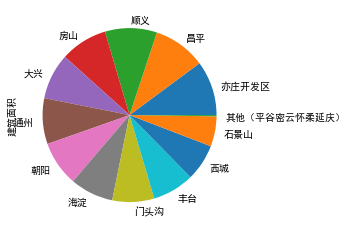

In [101]:
# 饼图呈现
result_df.plot(kind='pie', y='建筑面积', legend=False)

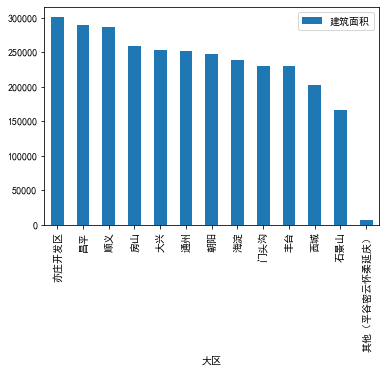

In [102]:
# 柱状图呈现
result_df.plot(kind='bar')

### 需求03：按照周来分析，每一周中的北京市的二手房交易的数量是上涨还是下降趋势，还是基本不变？

按照 成交时间(周) 来进行分析！ 按照( 成交时间(年) 和 成交时间(周) )这两个字段进行分组！
分组之后的每一组做计数操作！

In [130]:
result_df = lianjia.groupby(['成交时间（年）', '成交时间（周）'])[ '成交时间（周）'].count()
display(result_df.loc[2019].head(60))

成交时间（周）
1      459
2      110
3      144
4      157
5      283
6        1
7       46
8      104
9      620
10     190
11     176
12     151
13     171
14     690
15     270
16     286
17     292
18    1252
19     365
20     445
21     439
22    1642
23     418
24     470
25     486
26     651
27    1625
28     602
29     700
30     913
31    2432
32     660
33     733
34     769
35    2596
36     956
37    1007
38     994
39    1229
40    1541
41     861
42     988
43    1157
44     508
Name: 成交时间（周）, dtype: int64

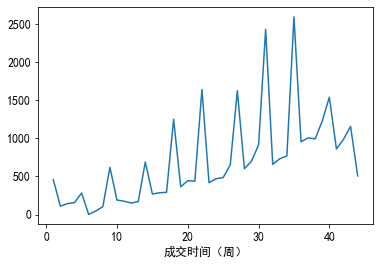

In [131]:
result_df.loc[2019].plot(kind='line')

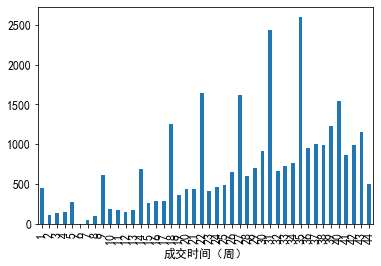

In [132]:
result_df.loc[2019].plot(kind='bar')

Text(0.5, 1.0, '2019年北京市各周二手房成交量')

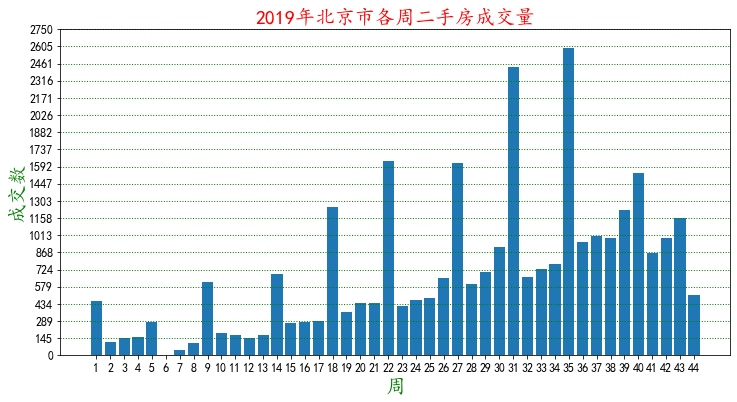

In [133]:
year = 2019

mpl.rcParams["font.size"] = 12

plt.figure(figsize=(12,6))

plt.bar(result_df.loc[year].index, result_df.loc[year].values)

plt.xticks(result_df.loc[year].index)
plt.yticks(np.linspace(0, 2750, 20))

font = {"family":"Kaiti",
       "style":"oblique",
        "weight":"normal",
        "color":"green",
        "size": 20
       }
plt.xlabel("周", fontdict=font)
plt.ylabel("成交数", fontdict=font)

plt.grid(axis="y", color="g", ls=":", lw=1)

plt.title(str(year) + "年北京市各周二手房成交量", fontdict=font, color= "r")

### 需求04：按照周来分析，每一周的二手房成交的单位均价的走势怎么样？

In [124]:
result_df = lianjia.groupby(['成交时间（年）', '成交时间（周）'])[['成交价（万）', '建筑面积']].agg(
{'成交价（万）':'sum', '建筑面积':'sum'})
result_df['单位均价'] = result_df['成交价（万）'] / result_df['建筑面积']
display(result_df.loc[2019].head(60))

,成交价（万）,建筑面积,单位均价
成交时间（周）,,,
1,152093.5,42149.109375,3.608463
2,37323.0,9809.650391,3.804723
3,50277.0,13645.730469,3.684449
4,49815.0,13910.530273,3.581100
5,93425.5,26021.720703,3.590289
6,412.0,152.449997,2.702525
7,14893.0,3891.159912,3.827394
8,32327.0,8988.110352,3.596640
9,220760.5,58592.640625,3.767717


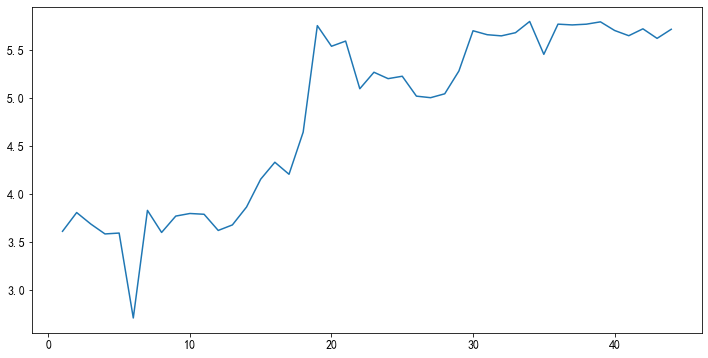

In [127]:
year = 2019

mpl.rcParams["font.size"] = 12

plt.figure(figsize=(12,6))

plt.plot(result_df.loc[year].index, result_df.loc[year]["单位均价"])

### 需求05：按周分析平均挂牌周期

1、关于挂牌周期： 通过 成交时间 - 挂牌时间！

2、按周分析： 按照 成交时间(周) 这个字段进行分组。 每一组就求 挂牌周期 这个字段的平均值！

3、请画一张图，来显示这个数据的趋势！ 

### 需求06：各种户型销售情况

In [134]:
lianjia.head()

,index,大区,成交价（万）,成交时间,所在小区,户型,建筑面积,挂牌价格（万）,成交周期（天）,调价（次）,带看（次）,关注（人）,浏览（次,链家编号,交易权属,挂牌时间,房屋用途,房屋年限,房权所属,房屋户型,所在楼层,户型结构,套内面积（㎡）,建筑类型,房屋朝向,建成年代,装修情况,建筑结构,供暖方式,梯户比例,产权年限,配备电梯,成交时间（年）,成交时间（周）
0,1,大兴,297.0,2019-10-29,格林云墅,3室1厅,89.949997,300.0,607.0,1.0,4.0,43.0,6424.0,1.01E+11,商品房,2018-03-01,普通住宅,满两年,非共有,3室1厅1厨1卫,中楼层(共9层),暂无数据,73.629997,塔楼,南 北,2014,精装,钢混结构,集中供暖,一梯两户,70,有,2019,44
1,2,大兴,366.0,2019-10-29,三羊里,2室1厅,89.790001,368.0,30.0,0.0,3.0,4.0,118.0,1.01E+11,商品房,2019-09-29,普通住宅,满两年,非共有,2室1厅1厨1卫,中楼层(共6层),平层,80.440002,板楼,南 北,2009,其他,钢混结构,集中供暖,一梯两户,70,无,2019,44
2,3,大兴,226.0,2019-10-29,亦庄北岸,1室1厅,56.040001,230.0,363.0,1.0,98.0,141.0,4707.0,1.01E+11,商品房,2018-10-31,普通住宅,满五年,非共有,1室1厅1厨1卫,底层(共15层),平层,45.990002,板塔结合,东北,2008,简装,钢混结构,自供暖,两梯四户,70,有,2019,44
3,4,大兴,548.0,2019-10-29,时代龙和,3室2厅,144.649994,595.0,38.0,0.0,17.0,19.0,972.0,1.01E+11,商品房,2019-09-21,普通住宅,满五年,非共有,3室2厅1厨2卫,中楼层(共15层),平层,118.589996,板塔结合,南 北,2007,简装,钢混结构,自供暖,一梯两户,70,有,2019,44
4,5,大兴,245.0,2019-10-29,观音寺北里,2室2厅,83.510002,259.0,114.0,1.0,1.0,16.0,1309.0,1.01E+11,商品房,2019-07-07,普通住宅,满五年,非共有,2室2厅1厨1卫,中楼层(共6层),平层,78.372452,板楼,东 西,1998,精装,混合结构,集中供暖,一梯两户,70,无,2019,44


In [143]:
# 取销量最好的前10名
result_huxing = lianjia.groupby('户型')['户型'].count()
result_huxing_top10 = result_huxing.sort_values(ascending=False).head(10)
display(result_huxing_top10)

户型
2室1厅    16245
1室1厅     5611
3室1厅     5085
3室2厅     2672
2室2厅     2082
1室0厅     1393
4室2厅      622
4室1厅      258
5室2厅      126
2室0厅      101
Name: 户型, dtype: int64

Text(0.5, 1.0, '北京市各户型成交量')

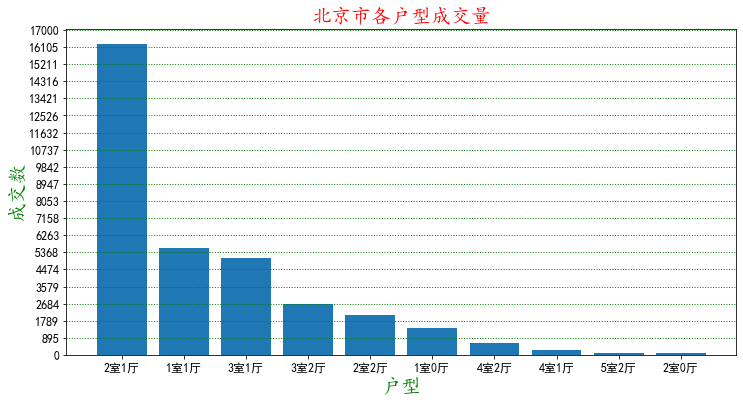

In [147]:
# 绘图

mpl.rcParams["font.size"] = 12

plt.figure(figsize=(12,6))

plt.bar(result_huxing_top10.index,result_huxing_top10.values)

plt.xticks(result_huxing_top10.index)
plt.yticks(np.linspace(0, 17000, 20))

font = {"family":"Kaiti",
       "style":"oblique",
        "weight":"normal",
        "color":"green",
        "size": 20
       }
plt.xlabel("户型", fontdict=font)
plt.ylabel("成交数", fontdict=font)

plt.grid(axis="y", color="g", ls=":", lw=1)

plt.title("北京市各户型成交量", fontdict=font, color= "r")

### 需求07：北京市各城区二手房屋平均单价

In [148]:
lianjia.head()

,index,大区,成交价（万）,成交时间,所在小区,户型,建筑面积,挂牌价格（万）,成交周期（天）,调价（次）,带看（次）,关注（人）,浏览（次,链家编号,交易权属,挂牌时间,房屋用途,房屋年限,房权所属,房屋户型,所在楼层,户型结构,套内面积（㎡）,建筑类型,房屋朝向,建成年代,装修情况,建筑结构,供暖方式,梯户比例,产权年限,配备电梯,成交时间（年）,成交时间（周）
0,1,大兴,297.0,2019-10-29,格林云墅,3室1厅,89.949997,300.0,607.0,1.0,4.0,43.0,6424.0,1.01E+11,商品房,2018-03-01,普通住宅,满两年,非共有,3室1厅1厨1卫,中楼层(共9层),暂无数据,73.629997,塔楼,南 北,2014,精装,钢混结构,集中供暖,一梯两户,70,有,2019,44
1,2,大兴,366.0,2019-10-29,三羊里,2室1厅,89.790001,368.0,30.0,0.0,3.0,4.0,118.0,1.01E+11,商品房,2019-09-29,普通住宅,满两年,非共有,2室1厅1厨1卫,中楼层(共6层),平层,80.440002,板楼,南 北,2009,其他,钢混结构,集中供暖,一梯两户,70,无,2019,44
2,3,大兴,226.0,2019-10-29,亦庄北岸,1室1厅,56.040001,230.0,363.0,1.0,98.0,141.0,4707.0,1.01E+11,商品房,2018-10-31,普通住宅,满五年,非共有,1室1厅1厨1卫,底层(共15层),平层,45.990002,板塔结合,东北,2008,简装,钢混结构,自供暖,两梯四户,70,有,2019,44
3,4,大兴,548.0,2019-10-29,时代龙和,3室2厅,144.649994,595.0,38.0,0.0,17.0,19.0,972.0,1.01E+11,商品房,2019-09-21,普通住宅,满五年,非共有,3室2厅1厨2卫,中楼层(共15层),平层,118.589996,板塔结合,南 北,2007,简装,钢混结构,自供暖,一梯两户,70,有,2019,44
4,5,大兴,245.0,2019-10-29,观音寺北里,2室2厅,83.510002,259.0,114.0,1.0,1.0,16.0,1309.0,1.01E+11,商品房,2019-07-07,普通住宅,满五年,非共有,2室2厅1厨1卫,中楼层(共6层),平层,78.372452,板楼,东 西,1998,精装,混合结构,集中供暖,一梯两户,70,无,2019,44


In [151]:
result_zongjia = lianjia.groupby('大区')['成交价（万）'].mean()
result_mianji = lianjia.groupby('大区')['建筑面积'].mean()

result_danjia = result_zongjia / result_mianji * 10000
display(result_danjia)

大区
丰台               55120.707031
亦庄开发区            44830.246094
其他（平谷密云怀柔延庆）     23338.765625
大兴               40509.363281
房山               33613.132812
昌平               40723.351562
朝阳               61640.773438
海淀               79712.335938
石景山              49837.761719
西城              106437.335938
通州               43729.710938
门头沟              37437.039062
顺义               37441.554688
dtype: float32

Text(0.5, 1.0, '北京市各城区房屋平均单价')

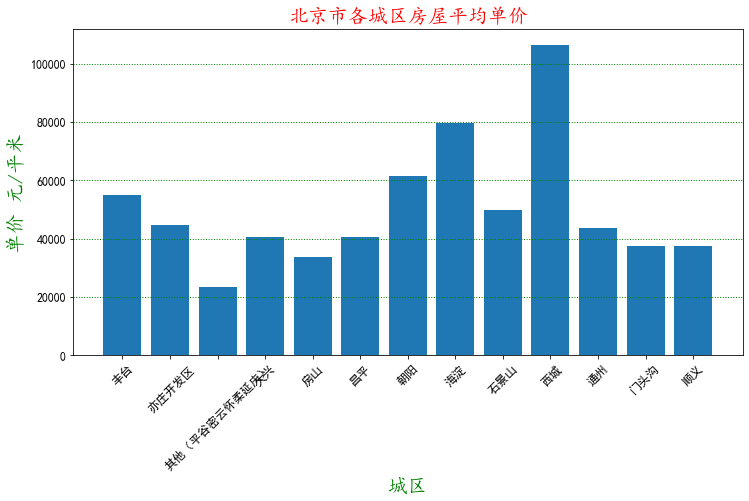

In [153]:
# 绘图
mpl.rcParams["font.size"] = 12

plt.figure(figsize=(12,6))

plt.bar(result_danjia.index,result_danjia.values)

plt.xticks(result_danjia.index, rotation=45)
# plt.yticks(np.linspace(0, 17000, 20))

font = {"family":"Kaiti",
       "style":"oblique",
        "weight":"normal",
        "color":"green",
        "size": 20
       }
plt.xlabel("城区", fontdict=font)
plt.ylabel("单价 元/平米", fontdict=font)

plt.grid(axis="y", color="g", ls=":", lw=1)

plt.title("北京市各城区房屋平均单价", fontdict=font, color= "r")